In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'C:\Users\hp\Desktop\Housing.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

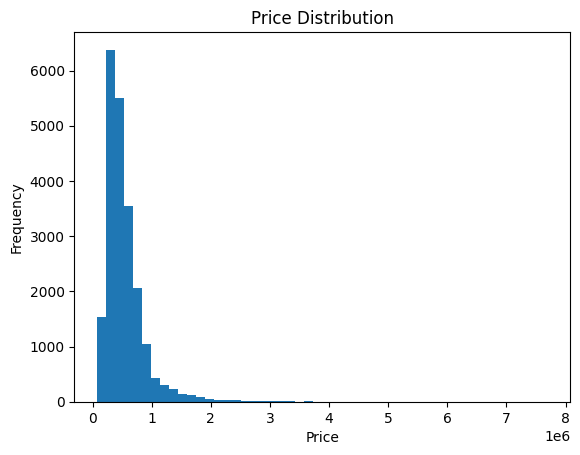

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [8]:
import pandas as pd

# Assuming df['price'] is your price column
skew_value = df['price'].skew()
print(f"Skewness: {skew_value:.2f}")


Skewness: 4.02


In [9]:
import numpy as np

df['log_price'] = np.log(df['price'])


In [10]:
#To check if your price column has any zeros
print((df['log_price']==0).sum())

0


In [11]:
print("Skewness after log:", df['log_price'].skew())


Skewness after log: 0.42808819125151226


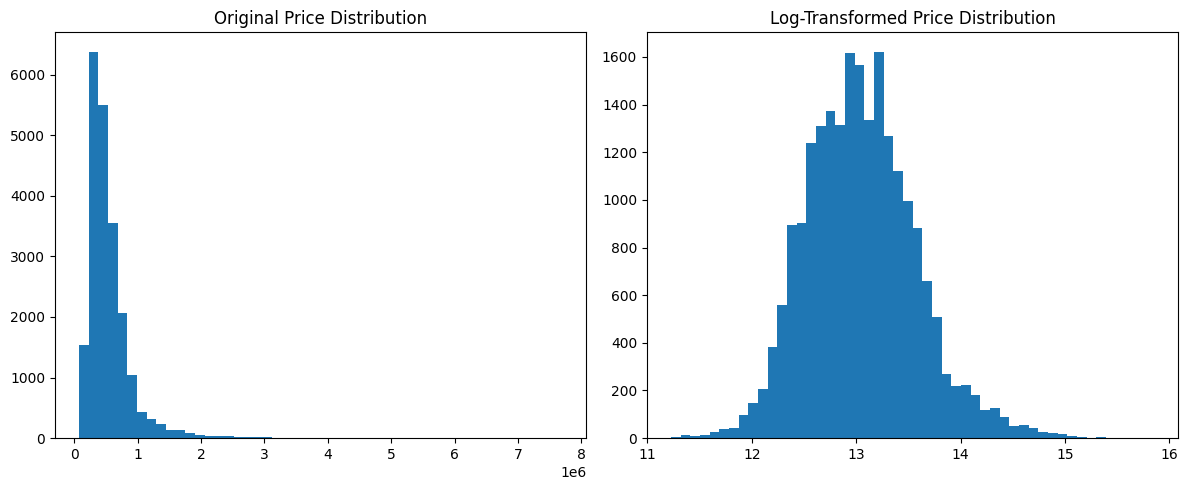

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50)
plt.title("Original Price Distribution")

# After
plt.subplot(1, 2, 2)
plt.hist(df['log_price'], bins=50)
plt.title("Log-Transformed Price Distribution")

plt.tight_layout()
plt.show()


In [15]:
X = df.drop(['price', 'log_price', 'date'], axis=1)
y = df['log_price']


In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

In [17]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Root Mean Squared Error: 0.1787954519683663
R² Score: 0.8878448404332916


In [18]:
predicted_log = rf.predict(x_test)
predicted_price = np.expm1(predicted_log)  # use np.expm1 if you used log1p


In [19]:
actual_price = np.expm1(y_test)  # same as np.exp(y_test) - 1


In [20]:
rmse = np.sqrt(mean_squared_error(actual_price, predicted_price))
r2 = r2_score(actual_price, predicted_price)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 138771.1121938518
R² Score: 0.8726164811231024


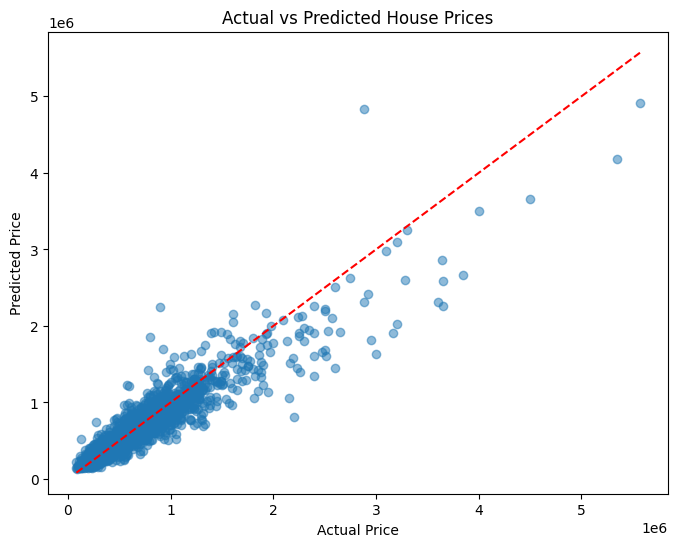

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(actual_price, predicted_price, alpha=0.5)
plt.plot([actual_price.min(), actual_price.max()],
         [actual_price.min(), actual_price.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [22]:
# Remove top 1% price outliers
q99 = df['price'].quantile(0.99)
df = df[df['price'] < q99]


In [41]:
df['log_price'] = np.log1p(df['price'])  # reapply if removed

# Drop id, price, log_price, and date columns
X = df.drop(['price', 'log_price', 'date'], axis=1)

y = df['log_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [40]:
#df['house_age'] = 2025 - df['yr_built']
#df['was_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Drop original if you want
#df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)



print(df.columns)




Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'log_price', 'house_age', 'was_renovated'],
      dtype='object')


In [42]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict and inverse log
y_pred_log = xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)
actual = np.expm1(y_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(actual, y_pred)))
print("R² Score:", r2_score(actual, y_pred))


RMSE: 95122.1077805578
R² Score: 0.8862300756337964


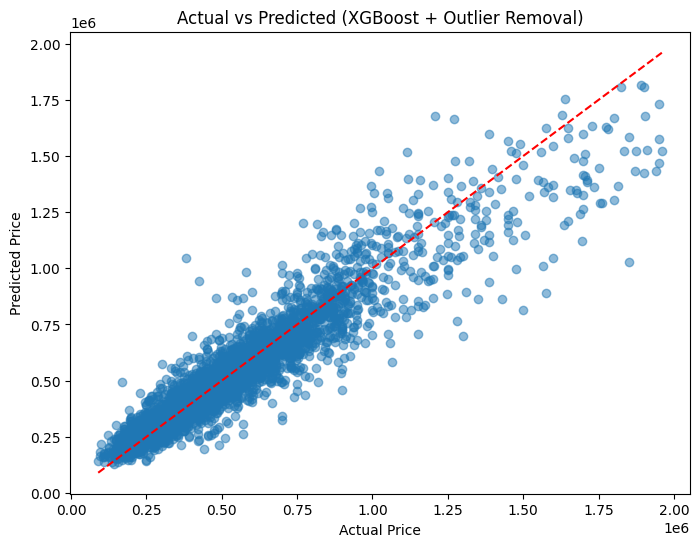

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(actual, y_pred, alpha=0.5)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (XGBoost + Outlier Removal)")
plt.show()


In [ ]:
#pip install streamlit


In [44]:
import joblib
joblib.dump(xgb, 'xgboost2_model.pkl')


['xgboost2_model.pkl']